In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Using a package you should now be quite familiar with, let's grab some real-world data available on the web 
wiki_url = 'https://en.wikipedia.org/wiki/List_of_potentially_habitable_exoplanets'
df = pd.read_html(wiki_url, match="Object")[0]
print(df)

                            Object        Star Star type           Mass (M⊕)  \
0   Earth (reported for reference)         Sun       G2V                1.00   
1   Venus (reported for reference)         Sun       G2V               0.815   
2    Mars (reported for reference)         Sun       G2V               0.107   
3                      Gliese 12 b   Gliese 12       M4V  0.71 or 0.95[7][8]   
4                     Gliese 163 c  Gliese 163       M3V               ≥6.80   
..                             ...         ...       ...                 ...   
61                     TRAPPIST-1e  TRAPPIST-1       M8V                0.69   
62                     TRAPPIST-1f  TRAPPIST-1       M8V                1.04   
63                     TRAPPIST-1g  TRAPPIST-1       M8V                1.32   
64                     Wolf 1069 b   Wolf 1069       M5V               ≥1.26   
65                      Wolf 1061c   Wolf 1061       M3V               ≥3.41   

              Radius (R⊕) Density (g/cm

In [2]:
#Teq and Period only, and perform a cleanup:
df_teq_vs_period_cleaned_nan = df[["Object", "Teq (K)", "Period (days)"]].dropna()
df_teq_vs_period_cleaned_teq = df_teq_vs_period_cleaned_nan[~df_teq_vs_period_cleaned_nan['Teq (K)'].isin(['214 [9]', '256+61 −17', '~280'])]
df_teq_vs_period_final_clean = df_teq_vs_period_cleaned_teq[~df_teq_vs_period_cleaned_teq['Period (days)'].isin(['12.76144±0.00006'])].reset_index(drop=True)

In [3]:
# The new Data after cleaning
df_teq_vs_period_final_clean

,Object,Teq (K),Period (days)
0,Earth (reported for reference),255,365.250
1,Venus (reported for reference),244.261,224.700
2,Mars (reported for reference),209.8,686.980
3,Gliese 12 b,315,12.700
4,Gliese 163 c,277,25.600
5,Gliese 357 d,200,55.700
6,Gliese 514 b,202,140.400
7,Gliese 555 b,214[11],36.200
8,Gliese 667 Cc,277,28.100
9,Gliese 1002 b,231,10.300


In [4]:
df_teq_vs_period_final_clean.loc[7, "Teq (K)"] = 214

In [5]:
df_teq_vs_period_final_clean

,Object,Teq (K),Period (days)
0,Earth (reported for reference),255,365.250
1,Venus (reported for reference),244.261,224.700
2,Mars (reported for reference),209.8,686.980
3,Gliese 12 b,315,12.700
4,Gliese 163 c,277,25.600
5,Gliese 357 d,200,55.700
6,Gliese 514 b,202,140.400
7,Gliese 555 b,214,36.200
8,Gliese 667 Cc,277,28.100
9,Gliese 1002 b,231,10.300


In [6]:
#Then, let's convert each column to a numpy array:
teq = df_teq_vs_period_final_clean["Teq (K)"].to_numpy().astype(float)
period = df_teq_vs_period_final_clean["Period (days)"].to_numpy().astype(float)

In [7]:
df_teq_vs_period_final_clean

,Object,Teq (K),Period (days)
0,Earth (reported for reference),255,365.250
1,Venus (reported for reference),244.261,224.700
2,Mars (reported for reference),209.8,686.980
3,Gliese 12 b,315,12.700
4,Gliese 163 c,277,25.600
5,Gliese 357 d,200,55.700
6,Gliese 514 b,202,140.400
7,Gliese 555 b,214,36.200
8,Gliese 667 Cc,277,28.100
9,Gliese 1002 b,231,10.300


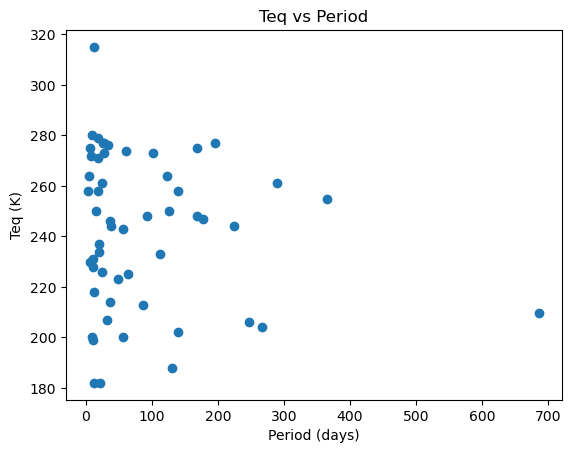

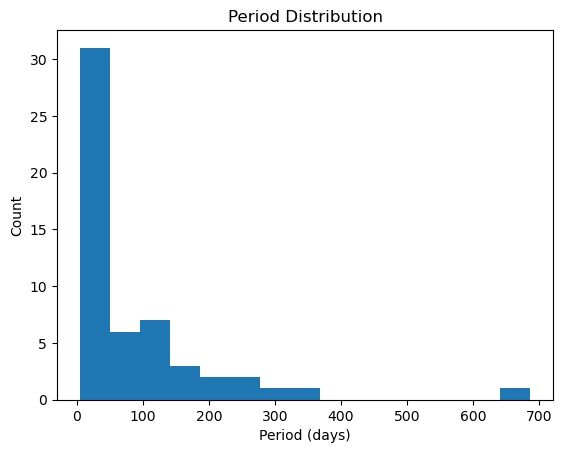

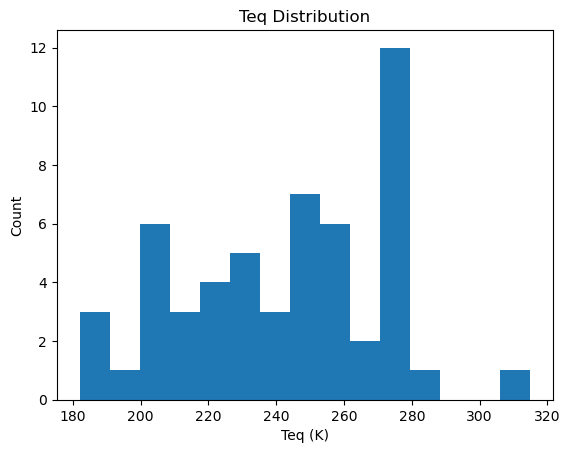

In [11]:
plt.scatter(period, teq)
plt.xlabel("Period (days)")
plt.ylabel("Teq (K)")
plt.title("Teq vs Period")
plt.show()

# --- Period Histogram ---
plt.figure()
plt.hist(period, bins=15)
plt.xlabel("Period (days)")
plt.ylabel("Count")
plt.title("Period Distribution")
plt.show()

# --- Teq Histogram ---
plt.figure()
plt.hist(teq, bins=15)
plt.xlabel("Teq (K)")
plt.ylabel("Count")
plt.title("Teq Distribution")
plt.show()

In [12]:
#Save the data cleaned df_teq_vs_period_final_clean
df_teq_vs_period_final_clean.to_csv('exoplanet_cleaned_teq_vs_period.csv', index = True)